In [134]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import precision_score, recall_score
import time
from collections import namedtuple
from itertools import product
import operator

In [7]:
df = pd.read_csv('D:\EPAM Internship\Python/my_data/train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,1,1,"Oconnor, Frankie",male,NaN,2,0,209245,27.14,C12239,S
1,1,0,3,"Bryan, Drew",male,NaN,0,0,27323,13.35,NaN,S
2,2,0,3,"Owens, Kenneth",male,0.33,1,2,CA 457703,71.29,NaN,S
3,3,0,3,"Kramer, James",male,19.00,0,0,A. 10866,13.04,NaN,S
4,4,1,3,"Bond, Michael",male,25.00,0,0,427635,7.76,NaN,S


In [8]:
other_df = df[['Survived', 'Pclass', 'Sex', 'Age', 'Fare', 'Embarked']]
other_df['Relatives'] = df.SibSp + df.Parch
other_df = other_df.dropna()
other_df.Sex.replace(to_replace=['male', 'female'], value=[0, 1], inplace=True)
other_df.Embarked.replace(to_replace=['S', 'C', 'Q'], value=[9, 1, 4], inplace=True)

<ipython-input-8-c308279a0d5a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  other_df['Relatives'] = df.SibSp + df.Parch


In [9]:
X = other_df.drop('Survived', axis=1)
y = other_df['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

Simple decision tree

In [10]:
clf_simple = DecisionTreeClassifier()
clf_simple.fit(X_train, y_train)
print('Train score:', clf_simple.score(X_train, y_train))
print('Test score:', clf_simple.score(X_test, y_test))

Train score: 0.9942516057873224
Test score: 0.6794519125966679


In [11]:
clf_simple.get_depth()

58

In [12]:
clf_simple.feature_importances_

array([0.03335355, 0.26048893, 0.20087294, 0.4113862 , 0.05393447,
       0.0399639 ])

In [13]:
predicted = clf_simple.predict(X_test)
print('Precision:', precision_score(predicted, y_test))
print('Recall:', recall_score(predicted, y_test))

Precision: 0.6263723006394016
Recall: 0.6277354612501511


------------------

Small decision tree

In [28]:
clf_small = DecisionTreeClassifier(max_depth=4)
clf_small.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4)

In [29]:
print('Train score:', clf_small.score(X_train, y_train))
print('Test score:', clf_small.score(X_test, y_test))

Train score: 0.70164147148511
Test score: 0.7044168786007162


In [30]:
clf_small.feature_importances_

array([0.21478765, 0.00525184, 0.07765562, 0.67916074, 0.02314416])

In [31]:
predicted = clf_small.predict(X_test)
print('Precision:', precision_score(predicted, y_test))
print('Recall:', recall_score(predicted, y_test))

Precision: 0.5009048136083967
Recall: 0.7271453590192645


----------------------

Dependency on maximal tree depth

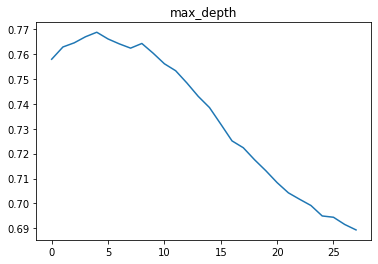

In [58]:
acc = []
for max_depth in range(2, 30):
    clf = DecisionTreeClassifier(max_depth=max_depth)
    clf.fit(X_train, y_train)
    acc.append(clf.score(X_test, y_test))
plt.plot(acc)
plt.title('max_depth')
plt.show()

--------------------

Dependency on min_samples_split parameter

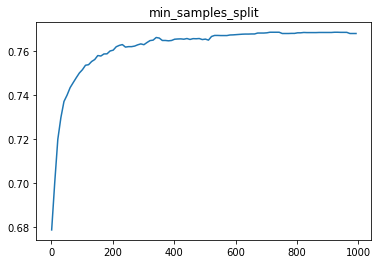

In [59]:
acc = []
values = range(2, 1000, 10)
for min_samples_split in values:
    clf = DecisionTreeClassifier(min_samples_split=min_samples_split)
    clf.fit(X_train, y_train)
    acc.append(clf.score(X_test, y_test))
plt.plot(values, acc)
plt.title('min_samples_split')
plt.show()

---------------------

Dependency on min_samples_leaf parameter

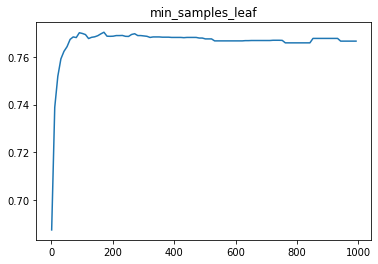

In [60]:
acc = []
values = range(2, 1000, 10)
for min_samples_leaf in values:
    clf = DecisionTreeClassifier(min_samples_leaf=min_samples_leaf)
    clf.fit(X_train, y_train)
    acc.append(clf.score(X_test, y_test))
plt.plot(values, acc)
plt.title('min_samples_leaf')
plt.show()

-----------------

In [87]:
clf_other_best = GridSearchCV(DecisionTreeClassifier(), {
    'min_samples_split': range(100, 800, 50),
    'min_samples_leaf': range(100, 800, 20),
})

In [88]:
start = time.time()
clf_other_best.fit(X_train, y_train)
print(time.time() - start)

319.98404240608215


In [89]:
print('Train score:', clf_other_best.score(X_train, y_train))
print('Test score:', clf_other_best.score(X_test, y_test))

Train score: 0.7733212223447739
Test score: 0.7692427466652826


In [103]:
clf_other_best.best_params_

{'min_samples_leaf': 80, 'min_samples_split': 560}

In [91]:
predicted = clf_other_best.predict(X_test)
print('Precision:', precision_score(predicted, y_test))
print('Recall:', recall_score(predicted, y_test))

Precision: 0.7286765592954518
Recall: 0.7332766784023309


In [92]:
clf_other_best.best_estimator_.tree_.max_depth

21

In [93]:
clf_the_best = DecisionTreeClassifier(min_samples_leaf=100, min_samples_split=100)
clf_the_best.fit(X_train, y_train)
print('Train score:', clf_the_best.score(X_train, y_train))
print('Test score:', clf_the_best.score(X_test, y_test))

Train score: 0.7766560695516772
Test score: 0.7707998131520216


In [109]:
all_features = list(X_train.columns)
score_info = namedtuple('score_info', ['feature', 'train_score', 'test_score', 'precision', 'recall', 'best_params'])
trees_info = []
start = time.time()
for feature in all_features:
    X_train_reduced = X_train.drop(feature, axis=1)
    X_test_reduced = X_test.drop(feature, axis=1)
    clf = GridSearchCV(DecisionTreeClassifier(), {
        'min_samples_split': range(100, 800, 50),
        'min_samples_leaf': range(100, 800, 50),
    })
    clf.fit(X_train_reduced, y_train)
    predicted = clf.predict(X_test_reduced)
    trees_info.append(score_info(feature,
                             clf.score(X_train_reduced, y_train),
                             clf.score(X_test_reduced, y_test),
                             precision_score(predicted, y_test),
                             recall_score(predicted, y_test),
                             clf.best_params_
                            ))
    print('Feature: {}\nTime: {}'.format(feature, time.time() - start))

Feature: Pclass
Time: 272.0510776042938
Feature: Sex
Time: 559.1806559562683
Feature: Age
Time: 798.3506784439087
Feature: Fare
Time: 987.0266103744507
Feature: Embarked
Time: 1264.3157625198364
Feature: Relatives
Time: 1522.1807959079742


In [128]:
all_feature_pairs = list(map(list, list(filter(lambda tup: tup[0] < tup[1], product(all_features, all_features)))))

In [129]:
start = time.time()
for features_pair in all_feature_pairs:
    X_train_reduced = X_train.drop(features_pair, axis=1)
    X_test_reduced = X_test.drop(features_pair, axis=1)
    clf = GridSearchCV(DecisionTreeClassifier(), {
        'min_samples_split': range(100, 800, 50),
        'min_samples_leaf': range(100, 800, 50),
    })
    clf.fit(X_train_reduced, y_train)
    predicted = clf.predict(X_test_reduced)
    trees_info.append(score_info(features_pair,
                             clf.score(X_train_reduced, y_train),
                             clf.score(X_test_reduced, y_test),
                             precision_score(predicted, y_test),
                             recall_score(predicted, y_test),
                             clf.best_params_
                            ))
    print('Features: {}\nTime: {}'.format(features_pair, time.time() - start))

Features: ['Pclass', 'Sex']
Time: 252.27139735221863
Features: ['Pclass', 'Relatives']
Time: 508.6605396270752
Features: ['Age', 'Pclass']
Time: 757.8531353473663
Features: ['Age', 'Sex']
Time: 989.444876909256
Features: ['Age', 'Fare']
Time: 1086.1328723430634
Features: ['Age', 'Embarked']
Time: 1313.155603170395
Features: ['Age', 'Relatives']
Time: 1519.0408599376678
Features: ['Fare', 'Pclass']
Time: 1654.5991258621216
Features: ['Fare', 'Sex']
Time: 1803.1965975761414
Features: ['Fare', 'Relatives']
Time: 1939.4698910713196
Features: ['Embarked', 'Pclass']
Time: 2169.891138076782
Features: ['Embarked', 'Sex']
Time: 2422.178153514862
Features: ['Embarked', 'Fare']
Time: 2559.9969210624695
Features: ['Embarked', 'Relatives']
Time: 2786.9563064575195
Features: ['Relatives', 'Sex']
Time: 3019.546160697937


In [130]:
trees_info

[score_info(feature='Pclass', train_score=0.7683513916823461, test_score=0.7659729070431307, precision=0.7461696223911207, recall=0.720023282887078, best_params={'min_samples_leaf': 300, 'min_samples_split': 100}),
 score_info(feature='Sex', train_score=0.7171738143125933, test_score=0.7151606373592152, precision=0.5851128000965135, recall=0.7030004348456298, best_params={'min_samples_leaf': 300, 'min_samples_split': 650}),
 score_info(feature='Age', train_score=0.7738013365340946, test_score=0.7663881247729278, precision=0.7362769936059839, recall=0.7249940603468757, best_params={'min_samples_leaf': 100, 'min_samples_split': 500}),
 score_info(feature='Fare', train_score=0.7695322130668916, test_score=0.7671147558000727, precision=0.7385691880805887, recall=0.7251836057806207, best_params={'min_samples_leaf': 250, 'min_samples_split': 100}),
 score_info(feature='Embarked', train_score=0.7665606955167715, test_score=0.7608864898531167, precision=0.7092532271685366, recall=0.72795938583

In [136]:
sorted(trees_info, key=operator.attrgetter('test_score'), reverse=True)[0]

score_info(feature='Relatives', train_score=0.7733731265814572, test_score=0.7692427466652826, precision=0.7353118590903607, recall=0.7302024679525578, best_params={'min_samples_leaf': 100, 'min_samples_split': 500})